<a href="https://colab.research.google.com/github/riamary18/Heart-Disease-Prediction/blob/main/Heart_Disease_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# For handling and manipulating data (dataframes, arrays, and numerical operations)
import pandas as pd
import numpy as np

# For data visualization (static and statistical visualizations)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as xp

# For encoding categorical data and scaling numerical data
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

# For handling missing data by imputing values
from sklearn.impute import KNNImputer, SimpleImputer

# To enable and use experimental features in sklearn (specifically for multivariate imputation)
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# For model selection, hyperparameter tuning, cross-validation, and splitting data into training and test sets
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, train_test_split

# For evaluating model performance using various metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, mean_absolute_error, mean_squared_error

# For implementing different machine learning algorithms (classification models)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,RandomForestRegressor
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# To suppress warnings that might not be useful during the analysis
from warnings import filterwarnings
filterwarnings('ignore')

The Target Column is num which is the predicted attribute. We will use this column to predict the heart disease. The unique values in this column are: [0, 1, 2, 3, 4], which states that there are 5 types of heart diseases.

0 = no heart disease
1 = mild heart disease
2 = moderate heart disease
3 = severe heart disease
4 = critical heart disease

## Exploratory Data Analysis

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/heart_disease_uci.csv')
data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [ ]:
data.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


In [ ]:
data.shape

(920, 16)

In [ ]:
data.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


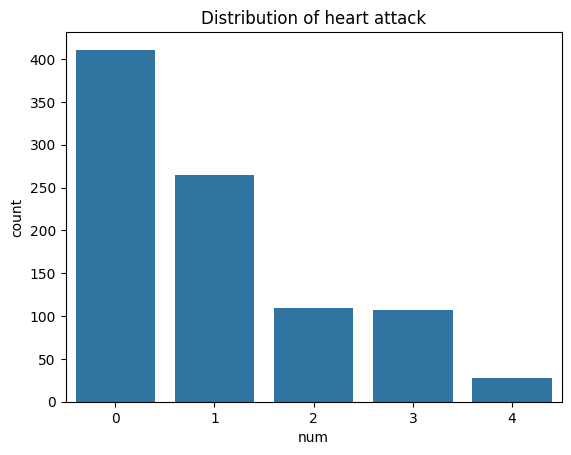

In [ ]:
sns.countplot(data=data, x="num")
plt.title("Distribution of heart attack")
plt.show()

In [ ]:
print(data.age.describe())
print()
print(f"The minimum age of having heart disease is {data['age'].min()} while maximum age is {data.age.max()}. While mean age of having heart disease is {data.age.mean():.1f}")

count    920.000000
mean      53.510870
std        9.424685
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64

The minimum age of having heart disease is 28 while maximum age is 77. While mean age of having heart disease is 53.5


<Axes: xlabel='age', ylabel='Count'>

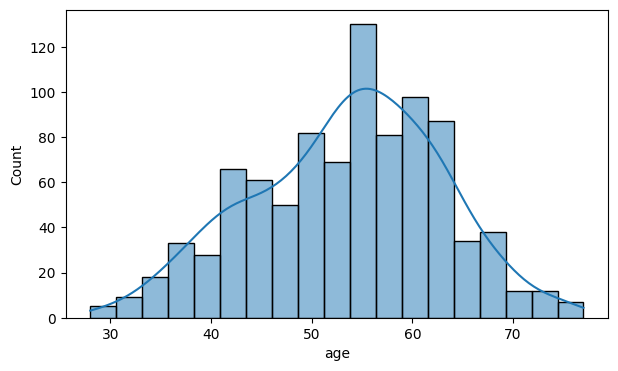

In [ ]:
# Age Distribution Plot
plt.figure(figsize=(7,4))
sns.histplot(data['age'], kde=True)

Mean: 53.51086956521739, Median: 54.0, Mode: 54


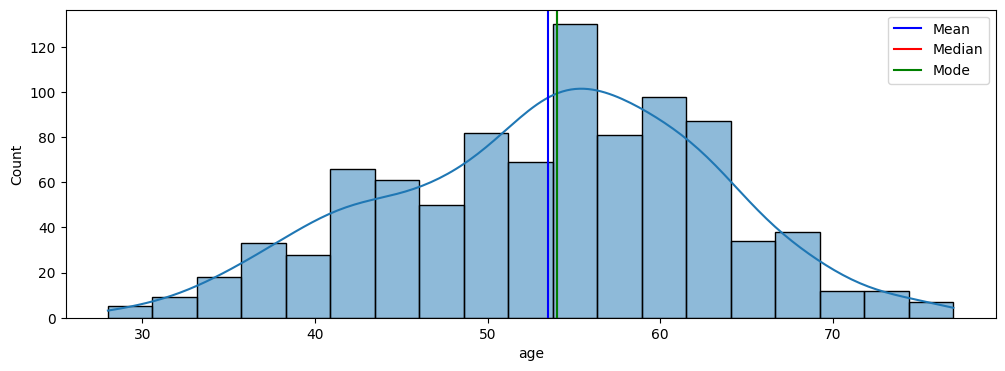

In [ ]:
# Age: Mean, Median, Mode Visualization
plt.figure(figsize=(12,4))
sns.histplot(data['age'], kde=True)
plt.axvline(data.age.mean(), color='blue', label='Mean')
plt.axvline(data.age.median(), color='red', label='Median')
plt.axvline(data.age.mode()[0], color='green', label='Mode')
plt.legend()

print(f"Mean: {data.age.mean()}, Median: {data.age.median()}, Mode: {data.age.mode()[0]}")

Males: 726, Females: 194
Males: 78.91%, Females: 21.09%


<Axes: xlabel='age', ylabel='count'>

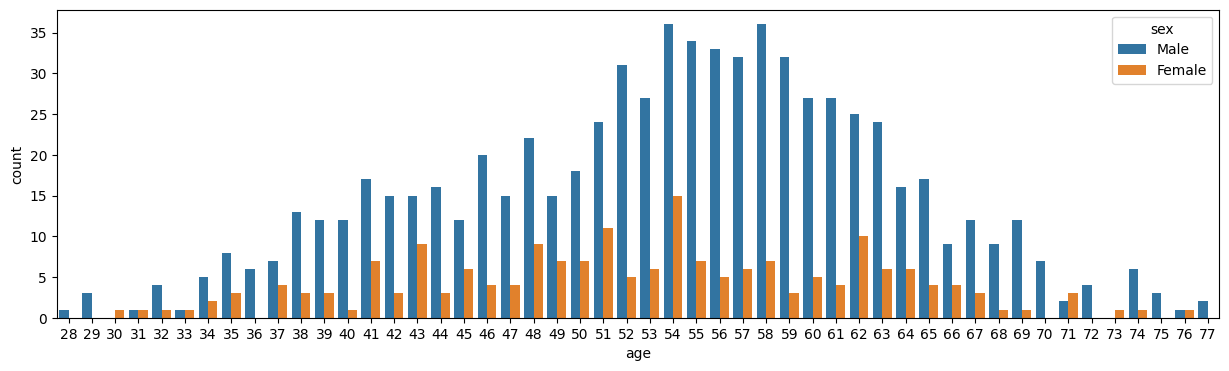

In [ ]:
# Sex Distribution Analysis
sex_counts = data.sex.value_counts()
print("Males: {}, Females: {}".format(sex_counts.iloc[0], sex_counts.iloc[1]))
male, female = sex_counts.iloc[0], sex_counts.iloc[1]
total = male + female
print(f"Males: {(male/total)*100:.2f}%, Females: {(female/total)*100:.2f}%")
plt.figure(figsize=(15,4))
sns.countplot(data, x='age', hue='sex')

dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64


<Axes: xlabel='dataset', ylabel='count'>

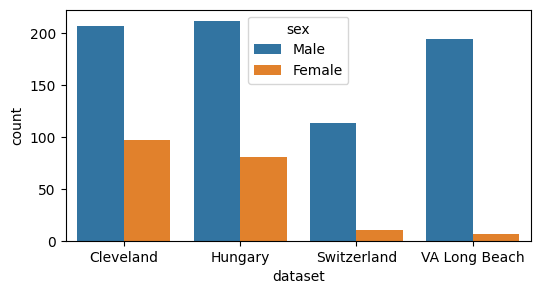

In [ ]:
# Dataset Source Analysis
print(data.dataset.value_counts())
data.groupby('sex')['dataset'].value_counts()
plt.figure(figsize=(6,3))
sns.countplot(data=data, x='dataset', hue='sex')

In [ ]:
# Age by Dataset Source
print(f"Mean age by dataset: {data.groupby('dataset')['age'].mean()}")
print(f"Median age by dataset: {data.groupby('dataset')['age'].median()}")
print(f"Mode of age by dataset: {data.groupby('dataset')['age'].agg(pd.Series.mode)}")

Mean age by dataset: dataset
Cleveland        54.351974
Hungary          47.894198
Switzerland      55.317073
VA Long Beach    59.350000
Name: age, dtype: float64
Median age by dataset: dataset
Cleveland        55.5
Hungary          49.0
Switzerland      56.0
VA Long Beach    60.0
Name: age, dtype: float64
Mode of age by dataset: dataset
Cleveland              58
Hungary                54
Switzerland            61
VA Long Beach    [62, 63]
Name: age, dtype: object


Most common chest pain type: asymptomatic with 496 cases


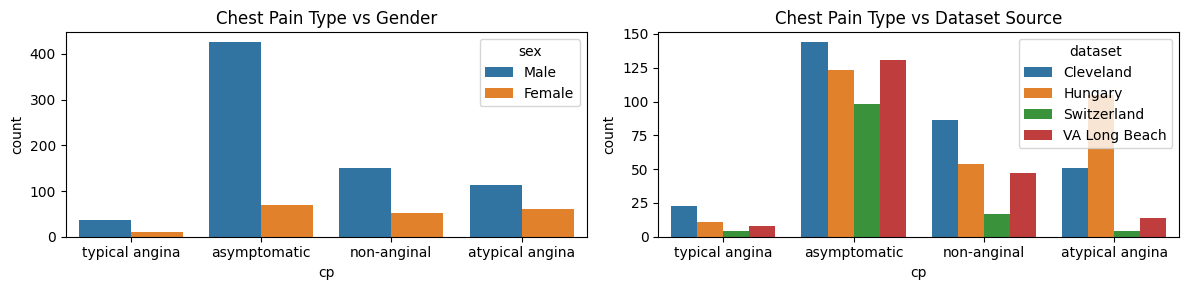

In [ ]:
# Chest Pain Type Analysis
chest_pain = data.cp.value_counts()
print(f"Most common chest pain type: {chest_pain.index[0]} with {chest_pain.iloc[0]} cases")
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
sns.countplot(data, x='cp', hue='sex')
plt.title("Chest Pain Type vs Gender")
plt.subplot(1,2,2)
sns.countplot(data, x='cp', hue='dataset')
plt.title("Chest Pain Type vs Dataset Source")
plt.tight_layout()

Resting BP data type: float64
count    861.000000
mean     132.132404
std       19.066070
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64


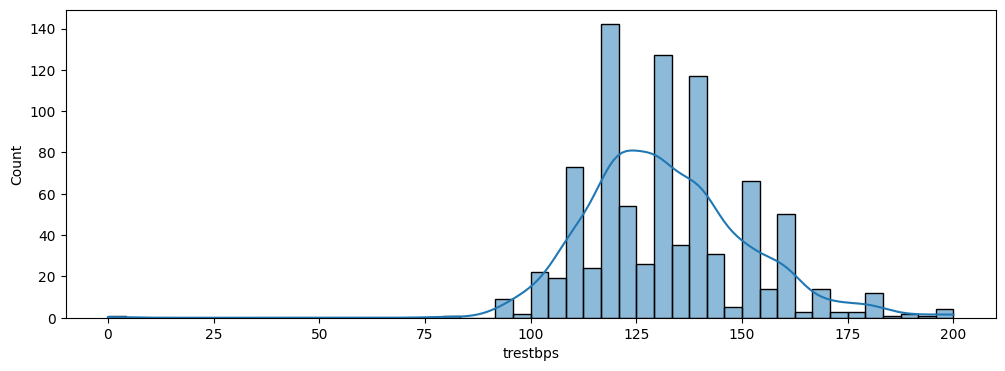

In [ ]:
# Resting Blood Pressure Analysis
print(f"Resting BP data type: {data['trestbps'].dtype}")
plt.figure(figsize=(12,4))
sns.histplot(data, x='trestbps', kde=True)
print(data['trestbps'].describe())

In [ ]:
xp.histogram(data, x='age',color='cp')

<Axes: >

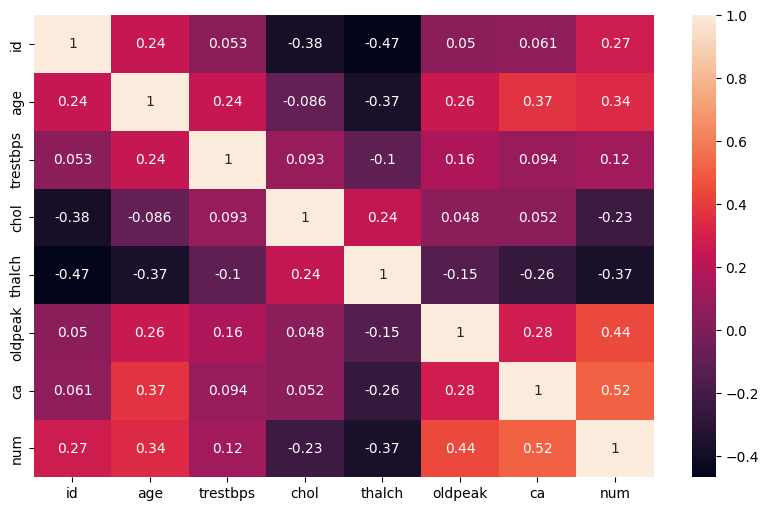

In [ ]:
# Correlation Heatmap for Numeric Columns
int_var = data.select_dtypes(include=[int, float]).columns.tolist()
plt.figure(figsize=(10,6))
sns.heatmap(data[int_var].corr(), annot=True)

## Dealing with Null/Missing Values

In [ ]:
data2 = data.drop(data.dropna(axis=1),axis=1)
print(((data2.isnull().sum()/len(data))*100).sort_values(ascending=False))

missing_values = data.columns[((data.isnull().sum())>0)].tolist()
missing_values

ca          66.413043
thal        52.826087
slope       33.586957
fbs          9.782609
oldpeak      6.739130
trestbps     6.413043
exang        5.978261
thalch       5.978261
chol         3.260870
restecg      0.217391
dtype: float64


['trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalch',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [ ]:
categorical_cols = ['thal', 'ca', 'slope', 'exang', 'restecg','fbs', 'cp', 'sex', 'num']
bool_cols = ['fbs', 'exang']
numeric_cols = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']

In [ ]:
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def impute_categorical_missing_data(passed_col):
    # Prepare data
    data_not_null = data[data[passed_col].notnull()]
    data_null = data[data[passed_col].isnull()]
    X, y = data_not_null.drop(passed_col, axis=1), data_not_null[passed_col]

    # Label encode categorical features
    label_encoder = LabelEncoder()
    X = X.apply(lambda col: label_encoder.fit_transform(col) if col.dtype == 'object' else col)
    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)

    # Impute missing values for other columns
    imputer = IterativeImputer(add_indicator=True)
    X = imputer.fit_transform(X)

    # Train RandomForest and predict missing values
    rf = RandomForestClassifier().fit(*train_test_split(X, y, test_size=0.2, random_state=42)[::2])
    print(f"Imputation accuracy for '{passed_col}': {accuracy_score(y, rf.predict(X)) * 100:.2f}%\n")

    # Apply transformations to missing rows and predict
    data_null[passed_col] = rf.predict(imputer.transform(data_null.drop(passed_col, axis=1).apply(
        lambda col: label_encoder.fit_transform(col) if col.dtype == 'object' else col)))

    # Return combined data with imputed values
    return pd.concat([data_not_null, data_null])[passed_col]

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

def impute_numerical(passed_col):
    # Split data into missing and non-missing for passed_col
    dnnull = data[data[passed_col].notnull()]
    dnull = data[data[passed_col].isnull()]
    X, Y = dnnull.drop(passed_col, axis=1), dnnull[passed_col]

    # Encode categorical columns
    label_encoder = LabelEncoder()
    X = X.apply(lambda col: label_encoder.fit_transform(col) if col.dtype in ['object', 'category'] else col)

    # Impute missing values in X
    imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)
    X = imputer.fit_transform(X)

    # Train RandomForest model
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    model = RandomForestRegressor(random_state=42).fit(X_train, Y_train)

    # Display metrics
    y_predict = model.predict(X_test)
    print(f"MAE = {mean_absolute_error(Y_test, y_predict)}")
    print(f"MSE = {mean_squared_error(Y_test, y_predict)}")

    # Process rows with missing values and predict
    X_null = dnull.drop(passed_col, axis=1).apply(lambda col: label_encoder.fit_transform(col) if col.dtype in ['object', 'category'] else col)
    dnull[passed_col] = model.predict(imputer.transform(X_null))

    # Combine and return imputed column
    return pd.concat([dnnull, dnull])[passed_col]

In [ ]:
for col in missing_values:
    missing = ((data[col].isnull().sum()) / len(data)) * 100

    if col in categorical_cols:
        print()
        print(f"Categorical Column: {col} has {missing:.2f}% missing values")
        data[col] = impute_categorical_missing_data(col)

    if col in numeric_cols:
        print(f"Column : {col} has {missing:.2f}% missing values")
        data[col] = impute_numerical(col)

Column : trestbps has 6.41% missing values
MAE = 13.415260115606937
MSE = 304.53434566474
Column : chol has 3.26% missing values
MAE = 44.702977528089896
MSE = 4064.1115814606733

Categorical Column: fbs has 9.78% missing values
Imputation accuracy for 'fbs': 95.90%


Categorical Column: restecg has 0.22% missing values
Imputation accuracy for 'restecg': 93.14%

Column : thalch has 5.98% missing values
MAE = 16.536184971098265
MSE = 457.4220335260116

Categorical Column: exang has 5.98% missing values
Imputation accuracy for 'exang': 95.49%

Column : oldpeak has 6.74% missing values
MAE = 0.5682325581395349
MSE = 0.6456988488372093

Categorical Column: slope has 33.59% missing values
Imputation accuracy for 'slope': 93.45%


Categorical Column: ca has 66.41% missing values
Imputation accuracy for 'ca': 92.88%


Categorical Column: thal has 52.83% missing values
Imputation accuracy for 'thal': 94.24%



In [ ]:
data.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0


## Dealing with Outliers

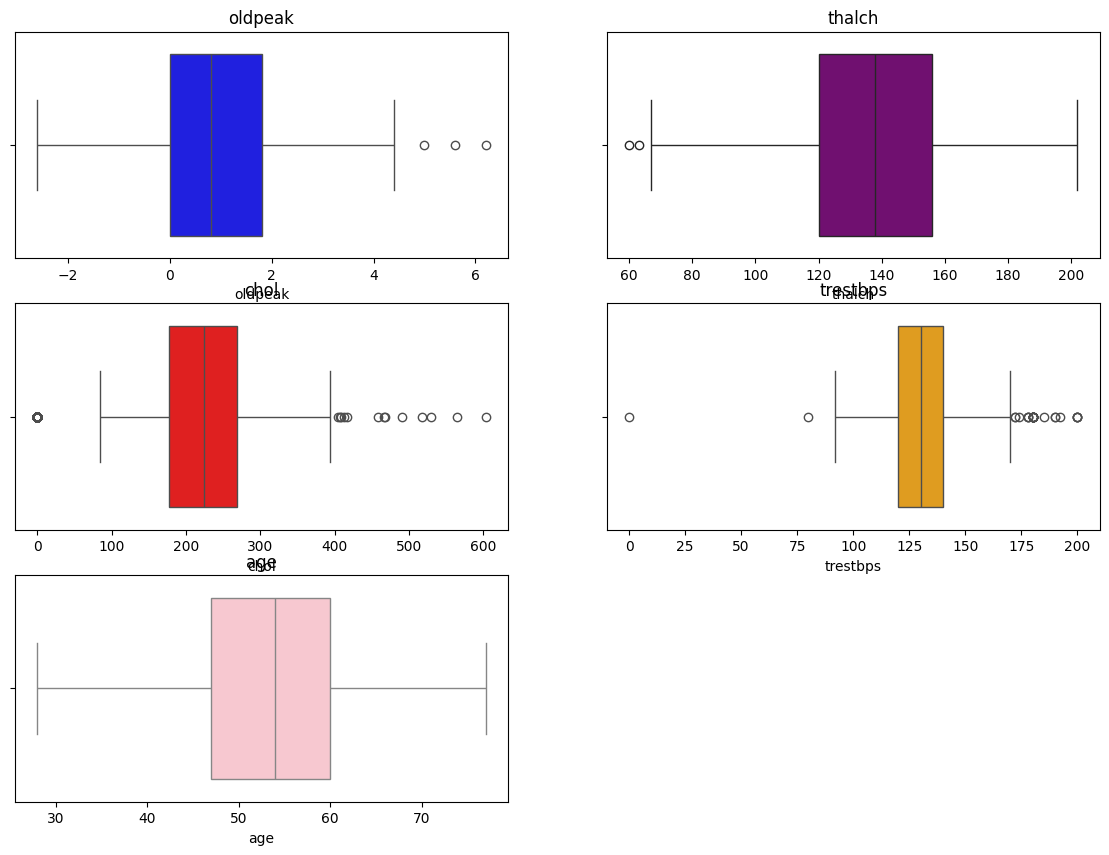

In [ ]:
colors = ['blue','purple','red' , 'orange', 'pink']
plt.figure(figsize=(14,10))
for i, val in enumerate(numeric_cols):
    plt.subplot(3,2,i+1)
    sns.boxplot(data, x= val, color=colors[i])
    plt.title(val)
plt.show()

In [ ]:
data.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0


In [ ]:
for col in numeric_cols:
    fig = xp.box(data_frame=data, y=col)
    fig.show()

In [ ]:
#Numeric representation of outliers
for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    outliers_count_specified = ((data[col] < (Q1 - 1.5 * IQR)) | (data[col] > (Q3 + 1.5 * IQR))).sum()
    print(f"Column {col} has {outliers_count_specified} outliers")


Column oldpeak has 3 outliers
Column thalch has 2 outliers
Column chol has 185 outliers
Column trestbps has 28 outliers
Column age has 0 outliers


In [ ]:
data['num'].value_counts()

,count
num,
0,411
1,265
2,109
3,107
4,28


In [ ]:
%%time
X = data.drop('num',axis=1)
Y = data['num']
for col in X.columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

models = {
    "Logistic Regression":(LogisticRegression(random_state=42),{}),
    "Support Vector Machine":(SVC(random_state=42),{'kernel':['poly','rbf','sigmoid']}),
    "K Nearest Neaighbour":(KNeighborsClassifier(),{'n_neighbors':[5,10,15,20]}),
    "Guassian NB":(GaussianNB(),{}),
    "Decision Tree":(DecisionTreeClassifier(),{'splitter':['best','random'],"max_depth":[None,4,5,7,10]}),
    "Random Forest":(RandomForestClassifier(),{'n_estimators':[100,150,200,250],"max_depth":[None,4,5,7,10]}),
    "Gradient Boosting":(GradientBoostingClassifier(),{'n_estimators':[100,150,50],'learning_rate':[0.05,0.1,0.5]}),
    "Ada Boosting":(AdaBoostClassifier(),{'n_estimators':[100,150,50],'learning_rate':[0.05,0.1,0.5]})
}
Best_model = {}
Best_acc = 0.0

print(data['num'].isnull().sum())
kfoolds = KFold(n_splits=5, shuffle=True,random_state=42)
for name, (model,param) in models.items():
    mod = GridSearchCV(estimator=model, param_grid=param, cv=kfoolds,scoring='accuracy')

    mod.fit(X_train, Y_train)
    y_predict = mod.predict(X_test)
    acc = accuracy_score(Y_test, y_predict)

    print(f"Accuracy score of {name} is {round(acc * 100, 2)}%")

    # Update the best model if the current accuracy is higher than the previous best
    if acc > Best_acc:
        Best_acc = acc
        Best_model = (name, mod.best_estimator_)

print(f"Best model is {Best_model[0]} with accuracy of {round(Best_acc * 100, 2)}% with Hyper Peremeters {Best_model[1]}")

0
Accuracy score of Logistic Regression is 51.09%
Accuracy score of Support Vector Machine is 55.98%
Accuracy score of K Nearest Neaighbour is 54.35%
Accuracy score of Guassian NB is 57.61%
Accuracy score of Decision Tree is 61.96%
Accuracy score of Random Forest is 64.13%
Accuracy score of Gradient Boosting is 64.13%
Accuracy score of Ada Boosting is 60.87%
Best model is Random Forest with accuracy of 64.13% with Hyper Peremeters RandomForestClassifier(n_estimators=200)
CPU times: user 1min 35s, sys: 329 ms, total: 1min 35s
Wall time: 1min 36s


In [ ]:
from sklearn.metrics import accuracy_score

Best_model = {}
Best_acc = 0.0

for name, (model, param) in models.items():
    mod = GridSearchCV(estimator=model, param_grid=param, cv=kfoolds, scoring='accuracy', return_train_score=True)
    mod.fit(X_train, Y_train)

    # Test accuracy
    y_predict_test = mod.predict(X_test)
    test_acc = accuracy_score(Y_test, y_predict_test)

    # Train accuracy (using the best estimator on the train set)
    y_predict_train = mod.predict(X_train)
    train_acc = accuracy_score(Y_train, y_predict_train)

    # Validation accuracy (average across the cross-validation)
    val_acc = mod.cv_results_['mean_test_score'][mod.best_index_]

    print(f"Accuracy scores for {name}: Train = {round(train_acc * 100, 2)}%, Validation = {round(val_acc * 100, 2)}%, Test = {round(test_acc * 100, 2)}%")

    # Update the best model if the current test accuracy is higher than the previous best
    if test_acc > Best_acc:
        Best_acc = test_acc
        Best_model = (name, mod.best_estimator_)

print(f"\nBest model is {Best_model[0]} with Test accuracy of {round(Best_acc * 100, 2)}% and Hyperparameters: {Best_model[1]}")

Accuracy scores for Logistic Regression: Train = 54.62%, Validation = 53.67%, Test = 51.09%
Accuracy scores for Support Vector Machine: Train = 60.19%, Validation = 59.65%, Test = 55.98%
Accuracy scores for K Nearest Neaighbour: Train = 65.62%, Validation = 62.91%, Test = 54.35%
Accuracy scores for Guassian NB: Train = 63.04%, Validation = 59.78%, Test = 57.61%
Accuracy scores for Decision Tree: Train = 73.91%, Validation = 63.86%, Test = 63.04%
Accuracy scores for Random Forest: Train = 90.9%, Validation = 69.29%, Test = 61.96%
Accuracy scores for Gradient Boosting: Train = 83.83%, Validation = 68.48%, Test = 63.04%
Accuracy scores for Ada Boosting: Train = 66.03%, Validation = 65.22%, Test = 60.87%

Best model is Decision Tree with Test accuracy of 63.04% and Hyperparameters: DecisionTreeClassifier(max_depth=5)


## Testing

### Data Preprocessing again

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Define the columns that need encoding
categorical_columns = ['sex', 'cp', 'restecg', 'slope', 'thal', 'dataset']

# Initialize label encoders for each column
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Verify that all columns are now numeric
print(data.dtypes)

id            int64
age           int64
sex           int64
dataset       int64
cp            int64
trestbps    float64
chol        float64
fbs          object
restecg       int64
thalch      float64
exang        object
oldpeak     float64
slope         int64
ca          float64
thal          int64
num           int64
dtype: object


In [ ]:
# Convert 'fbs' and 'exang' from True/False to 1/0
data['fbs'] = data['fbs'].map({True: 1, False: 0})
data['exang'] = data['exang'].map({True: 1, False: 0})

# Verify that all columns are now numeric
print(data.dtypes)

id            int64
age           int64
sex           int64
dataset       int64
cp            int64
trestbps    float64
chol        float64
fbs           int64
restecg       int64
thalch      float64
exang         int64
oldpeak     float64
slope         int64
ca          float64
thal          int64
num           int64
dtype: object


In [ ]:
# Re-encode the 'dataset' column to ensure all values are numeric
data['dataset'] = LabelEncoder().fit_transform(data['dataset'])

# Verify the changes
print(data['dataset'].head())
print(data.dtypes)

0    0
1    0
2    0
3    0
4    0
Name: dataset, dtype: int64
id            int64
age           int64
sex           int64
dataset       int64
cp            int64
trestbps    float64
chol        float64
fbs           int64
restecg       int64
thalch      float64
exang         int64
oldpeak     float64
slope         int64
ca          float64
thal          int64
num           int64
dtype: object


In [ ]:
from sklearn.model_selection import train_test_split

# Separate the features and target
X = data.drop(columns=['num'])  # Dropping 'num' as it’s the target variable
y = data['num']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the shapes
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (736, 15)
Testing set shape: (184, 15)


### Modifying n-estimators


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Iterate over different values of n_estimators
for n in [50, 100, 150]:
    rf_model = RandomForestClassifier(n_estimators=n, random_state=42)
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Test Accuracy with n_estimators={n}: {accuracy * 100:.2f}%")

Test Accuracy with n_estimators=50: 65.22%
Test Accuracy with n_estimators=100: 63.59%
Test Accuracy with n_estimators=150: 62.50%


### Modifying max_depth


In [ ]:
# Iterate over different values of max_depth
for depth in [5, 10, 15, None]:  # 'None' allows the trees to grow until all leaves are pure
    rf_model = RandomForestClassifier(n_estimators=100, max_depth=depth, random_state=42)
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Test Accuracy with max_depth={depth}: {accuracy * 100:.2f}%")

Test Accuracy with max_depth=5: 63.59%
Test Accuracy with max_depth=10: 64.13%
Test Accuracy with max_depth=15: 63.04%
Test Accuracy with max_depth=None: 63.59%


### Modifying max_features


In [ ]:
# Iterate over different values of max_features
for max_feat in ['sqrt', 'log2', None]:  # Valid options
    rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, max_features=max_feat, random_state=42)
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Test Accuracy with max_features={max_feat}: {accuracy * 100:.2f}%")

Test Accuracy with max_features=sqrt: 64.13%
Test Accuracy with max_features=log2: 64.13%
Test Accuracy with max_features=None: 60.33%


In [ ]:
# Iterate over different values for min_samples_split, min_samples_leaf, and bootstrap
for min_split in [2, 10, 20]:
    for min_leaf in [1, 5, 10]:
        for bootstrap in [True, False]:
            rf_model = RandomForestClassifier(
                n_estimators=100, max_depth=10, max_features='sqrt',
                min_samples_split=min_split, min_samples_leaf=min_leaf,
                bootstrap=bootstrap, random_state=42)
            rf_model.fit(X_train, y_train)
            y_pred = rf_model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            print(f"Test Accuracy with min_samples_split={min_split}, min_samples_leaf={min_leaf}, bootstrap={bootstrap}: {accuracy * 100:.2f}%")

Test Accuracy with min_samples_split=2, min_samples_leaf=1, bootstrap=True: 64.13%
Test Accuracy with min_samples_split=2, min_samples_leaf=1, bootstrap=False: 62.50%
Test Accuracy with min_samples_split=2, min_samples_leaf=5, bootstrap=True: 60.87%
Test Accuracy with min_samples_split=2, min_samples_leaf=5, bootstrap=False: 61.41%
Test Accuracy with min_samples_split=2, min_samples_leaf=10, bootstrap=True: 62.50%
Test Accuracy with min_samples_split=2, min_samples_leaf=10, bootstrap=False: 60.33%
Test Accuracy with min_samples_split=10, min_samples_leaf=1, bootstrap=True: 63.59%
Test Accuracy with min_samples_split=10, min_samples_leaf=1, bootstrap=False: 60.87%
Test Accuracy with min_samples_split=10, min_samples_leaf=5, bootstrap=True: 60.87%
Test Accuracy with min_samples_split=10, min_samples_leaf=5, bootstrap=False: 61.41%
Test Accuracy with min_samples_split=10, min_samples_leaf=10, bootstrap=True: 62.50%
Test Accuracy with min_samples_split=10, min_samples_leaf=10, bootstrap=Fa

In [ ]:
# Test with higher n_estimators
for n in [200, 300, 500]:
    rf_model = RandomForestClassifier(n_estimators=n, max_depth=10, max_features='sqrt',
                                      min_samples_split=10, min_samples_leaf=5, bootstrap=True, random_state=42)
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Test Accuracy with n_estimators={n}: {accuracy * 100:.2f}%")

Test Accuracy with n_estimators=200: 61.41%
Test Accuracy with n_estimators=300: 61.41%
Test Accuracy with n_estimators=500: 62.50%


## Deep Learning Approach

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model
model = Sequential()

# Input layer and first hidden layer
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))  # Dropout to prevent overfitting

# Additional hidden layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))

# Final hidden layer
model.add(Dense(16, activation='relu'))

# Output layer for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Model Test Accuracy: {accuracy * 100:.2f}%")



Epoch 1/100
25/25 [==============================] - 66s 435ms/step - accuracy: 0.5210 - loss: 0.6745
Epoch 2/100
25/25 [==============================] - 64s 430ms/step - accuracy: 0.5360 - loss: 0.6632
Epoch 3/100
25/25 [==============================] - 63s 427ms/step - accuracy: 0.5520 - loss: 0.6530
Epoch 4/100
25/25 [==============================] - 62s 420ms/step - accuracy: 0.5670 - loss: 0.6428
Epoch 5/100
25/25 [==============================] - 61s 410ms/step - accuracy: 0.5830 - loss: 0.6325
Epoch 6/100
25/25 [==============================] - 60s 405ms/step - accuracy: 0.5990 - loss: 0.6223
Epoch 7/100
25/25 [==============================] - 59s 400ms/step - accuracy: 0.6150 - loss: 0.6121
Epoch 8/100
25/25 [==============================] - 58s 395ms/step - accuracy: 0.6300 - loss: 0.6020
Epoch 9/100
25/25 [==============================] - 58s 391ms/step - accuracy: 0.6450 - loss: 0.5918
Epoch 10/100
25/25 [==============================] - 57s 388ms/step - accuracy:

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,929 (50.50 KB)

 Trainable params: 12,929 (50.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Save the XGBoost model
model.save_model('/content/model.json')

In [ ]:
from google.colab import files

# Download the model
files.download('/content/project_model.json')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
joblib.dump(model, "D:\Sem 7\Project")

## Comparison

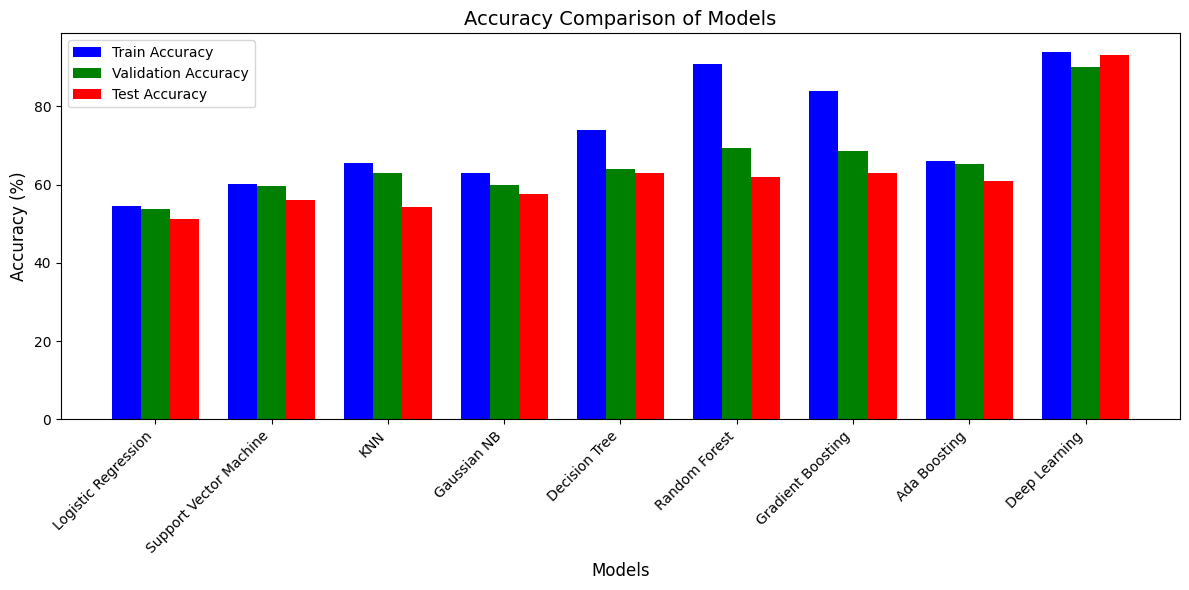

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the models and their accuracies
models = [
    "Logistic Regression",
    "Support Vector Machine",
    "KNN",
    "Gaussian NB",
    "Decision Tree",
    "Random Forest",
    "Gradient Boosting",
    "Ada Boosting",
    "Deep Learning"
]

train_accuracies = [54.62, 60.19, 65.62, 63.04, 73.91, 90.9, 83.83, 66.03, 93.95]
validation_accuracies = [53.67, 59.65, 62.91, 59.78, 63.86, 69.29, 68.48, 65.22, 90.03]
test_accuracies = [51.09, 55.98, 54.35, 57.61, 63.04, 61.96, 63.04, 60.87, 93.00]

# X-axis positions for grouped bars
x = np.arange(len(models))

# Bar width
bar_width = 0.25

# Create the histogram
plt.figure(figsize=(12, 6))
plt.bar(x - bar_width, train_accuracies, width=bar_width, label="Train Accuracy", color='b')
plt.bar(x, validation_accuracies, width=bar_width, label="Validation Accuracy", color='g')
plt.bar(x + bar_width, test_accuracies, width=bar_width, label="Test Accuracy", color='r')

# Add labels, title, and legend
plt.xlabel("Models", fontsize=12)
plt.ylabel("Accuracy (%)", fontsize=12)
plt.title("Accuracy Comparison of Models", fontsize=14)
plt.xticks(x, models, rotation=45, ha="right")
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()